# SETUP

### Setup variables

In [34]:
import numpy as np

# general variables
a = 0
b = 1
K = 5
N = 100
variance = 0.2
K_test_mle = [2, 5, 8, 12, 15, 90]

K_test_map = [2, K, 200]
lambdas = [0.1, 5, 10, 50, 100]

# gradient descent variables
epochs = 1000
learning_rate = 0.001
tolf = 1e-5
tolx = 1e-5

# sgd variables
sgd_epochs = epochs
sgd_learning_rate = learning_rate


### Define data generation functions

In [35]:
def vandermonde_matrix(x_values, k):
    exps = range(k)
    base = np.array([x_values] * k).T
    return base ** exps

def generate_data(N):
    theta_true = np.ones(K).T
    X = np.linspace(a, b, N)
    v = vandermonde_matrix(X, K)
    err = variance * np.random.normal(0, 1, N)
    Y = v @ theta_true + err
    return X, Y

### Define the function to compute the absoulte error between the predictions and the actual values

In [36]:
def abs_error(D, theta):
    X, y = D
    V = vandermonde_matrix(X, len(theta))
    y_pred = V @ theta
    return (1 / X.shape[0]) * np.linalg.norm(y_pred - y, 2) ** 2 

### Generate data

In [37]:
# generate training data
X, Y = generate_data(N)

# generate test data
N_test = 1000
X_test, Y_test = generate_data(N_test)

# Using Normal Equations

### Define the solvers for MLE and MAP using normal equations

In [38]:
def MLE(D, k):
    X, y = D
    V = vandermonde_matrix(X, k)
    return np.linalg.solve(V.T @ V, V.T @ y)

def MAP(D, k, lmbd):
    X, y = D
    V = vandermonde_matrix(X, k)
    return np.linalg.solve(V.T @ V + lmbd * np.eye(k), V.T @ y)

## MLE

### Generate test data and compute the predictions for different values of k

In [39]:
fitted_data_mle = []
for i in K_test_mle:
    theta = MLE((X, Y), i)
    y_test_mle = vandermonde_matrix(X_test, i) @ theta
    fitted_data_mle.append(y_test_mle)
    err = abs_error((X_test, Y_test), theta)
    print(f"Error for k = {i}: {err}")

Error for k = 2: 0.1418557919269171
Error for k = 5: 0.035279865608630064
Error for k = 8: 0.03676938392412621
Error for k = 12: 0.03715230153870631
Error for k = 15: 0.037122689948179445
Error for k = 90: 0.056511082221211255


### Plot the results

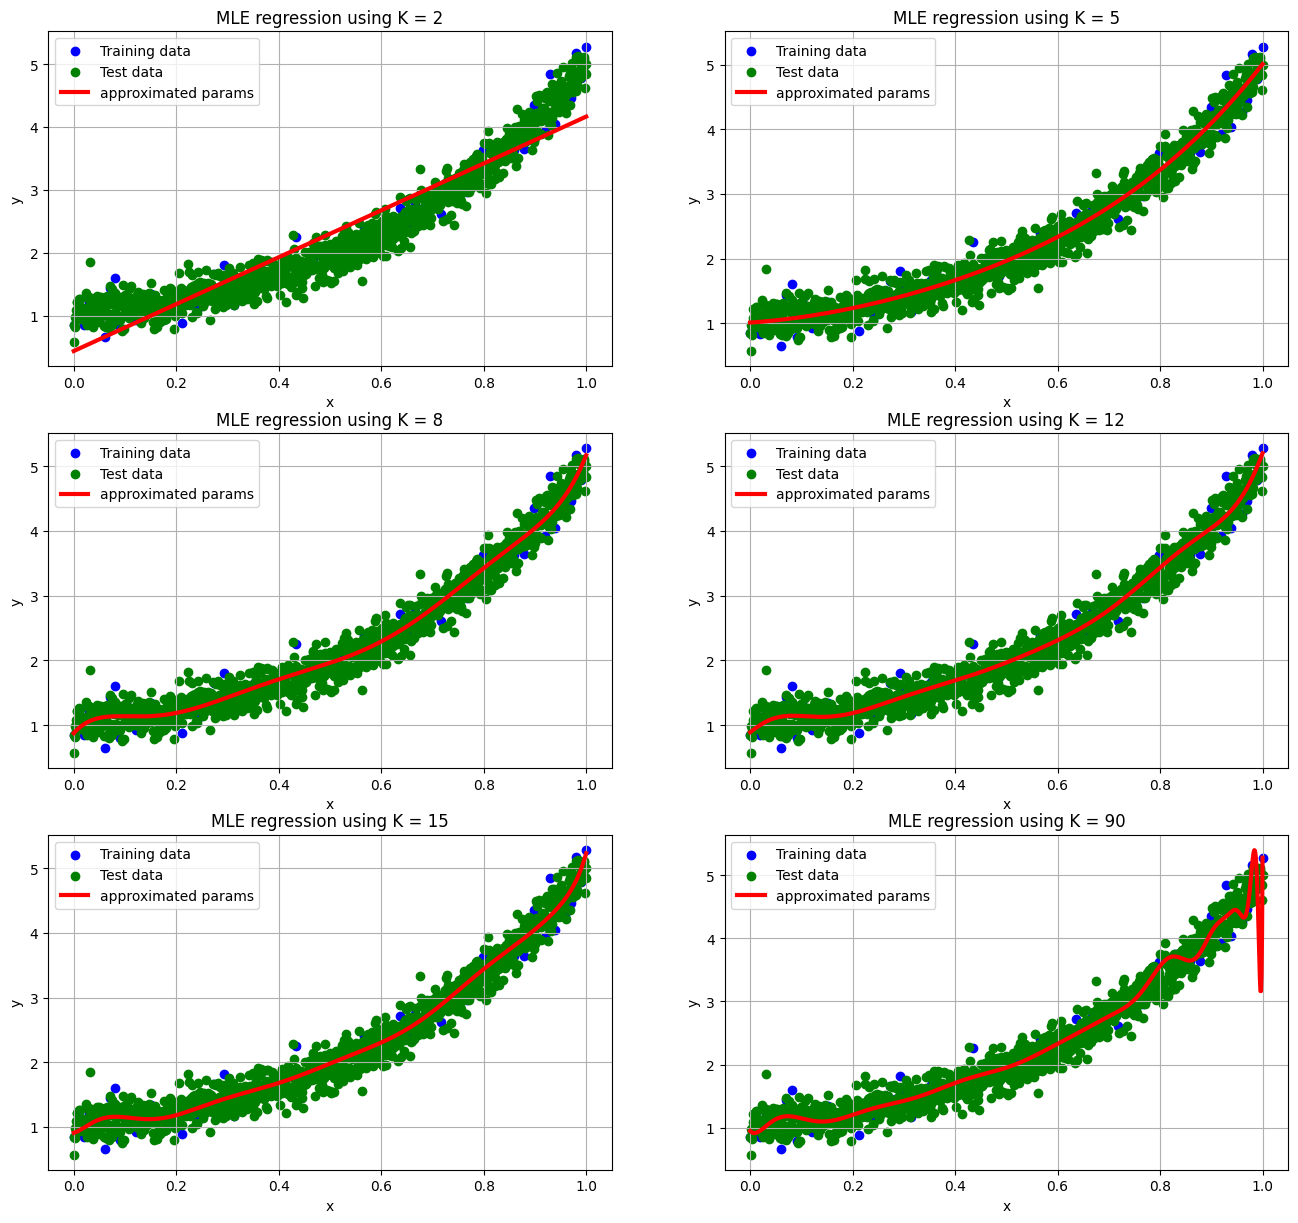

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 20))
for i, k in enumerate(K_test_mle):
    plt.subplot(len(K_test_mle) // 2 + 1, 2, i + 1)
    plt.scatter(X, Y, label='Training data', c='blue')
    plt.scatter(X_test, Y_test, label='Test data', c='green')
    plt.plot(X_test, fitted_data_mle[i], label=f'approximated params', c='red', linewidth=3)
    plt.title(f'MLE regression using K = {k}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()

plt.show()

Here we can observe that for K = 2, the model fails to provide a good approximation since it's not expressive enough, but as soon as K = 5, the model approximates the original function with sufficient accuracy.
For higher values of K, the model tends to overfit since the abundance of parameters make the model powerful enough to capture too many features of the input data, including noise. This isn't ideal since the performance on new, unseen data will be worse, as we can see in the graph below.

### Plot the train and test errors for different values of k

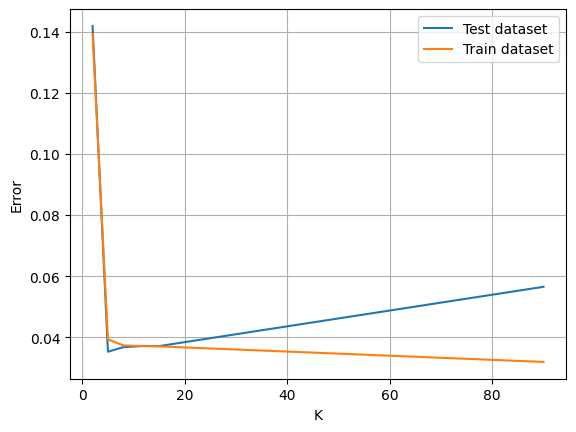

In [41]:
err_test = np.zeros((len(K_test_mle), ))
err_train = np.zeros((len(K_test_mle), ))

for i, k in enumerate(K_test_mle):
    theta = MLE((X, Y), k)
    err_test[i] = abs_error((X_test, Y_test), theta)
    err_train[i] = abs_error((X, Y), theta)

plt.plot(K_test_mle, err_test, label='Test dataset')
plt.plot(K_test_mle, err_train, label='Train dataset')
plt.xlabel('K')
plt.ylabel('Error')
plt.grid()
plt.legend()
plt.show()

From this error plot we can also observe that the error is much higher when the regression model uses a value for K much bigger than the correct one.

## MAP

In [42]:
fitted_data_map = []

for lmbd in lambdas:
    for k in K_test_map:
        theta = MAP((X, Y), k, lmbd)
        y_test_map = vandermonde_matrix(X_test, k) @ theta
        fitted_data_map.append(y_test_map)

        err = abs_error((X_test, Y_test), theta)
        print(f"Error for k = {k}, lambda = {lmbd}: {err}")

Error for k = 2, lambda = 0.1: 0.14159223821153427
Error for k = 5, lambda = 0.1: 0.035214858821759294
Error for k = 200, lambda = 0.1: 0.03594053629363196
Error for k = 2, lambda = 5: 0.25105845175103353
Error for k = 5, lambda = 5: 0.04548855535945936
Error for k = 200, lambda = 5: 0.046560806590810834
Error for k = 2, lambda = 10: 0.3762686105207078
Error for k = 5, lambda = 10: 0.07177070532203772
Error for k = 200, lambda = 10: 0.06869633773146505
Error for k = 2, lambda = 50: 1.0441327171215662
Error for k = 5, lambda = 50: 0.47328092123168225
Error for k = 200, lambda = 50: 0.37269946238857715
Error for k = 2, lambda = 100: 1.7556204599042073
Error for k = 5, lambda = 100: 1.0822645318401931
Error for k = 200, lambda = 100: 0.8567870994108442


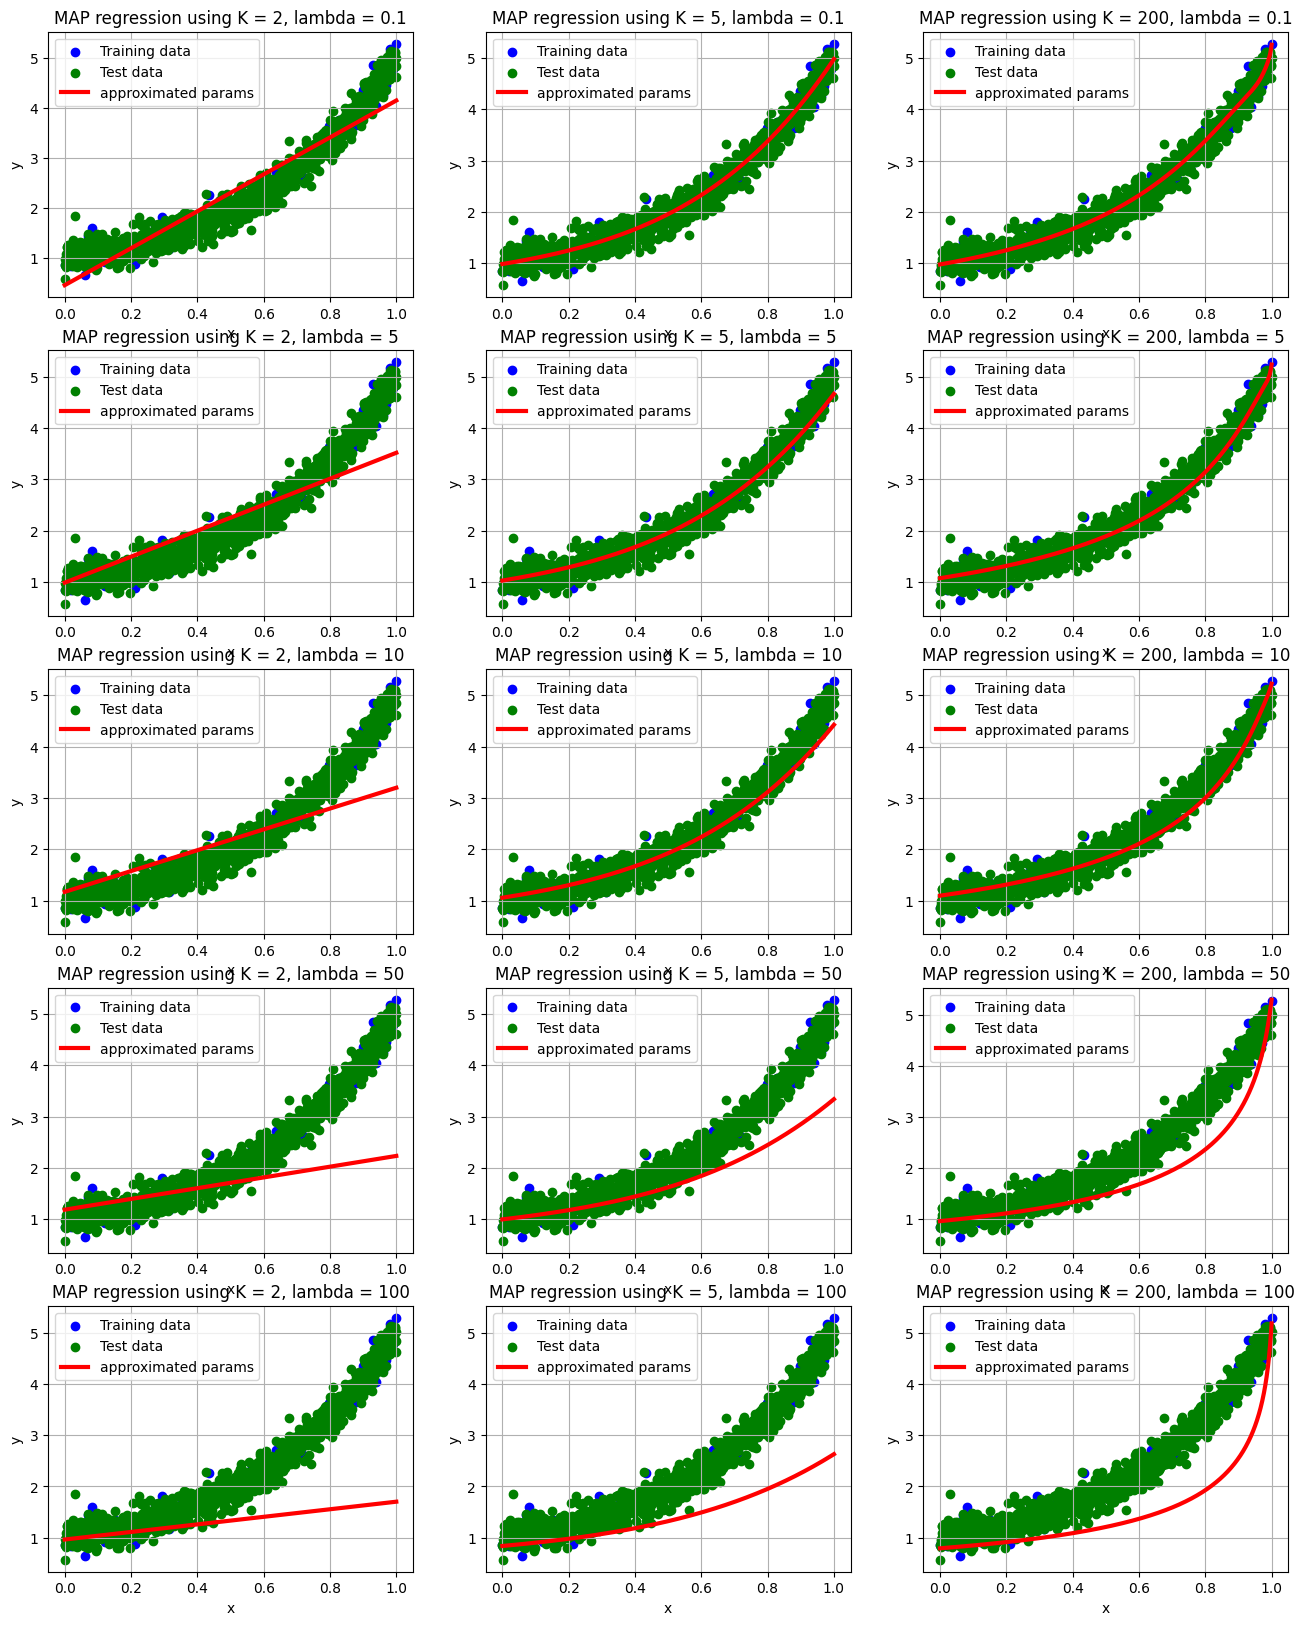

In [43]:
plt.figure(figsize=(16, 20))

for i, lmbd in enumerate(lambdas):
    for j, k in enumerate(K_test_map):
        index = i * len(K_test_map) + j
        plt.subplot(len(lambdas), len(K_test_map), index + 1)
        plt.scatter(X, Y, label='Training data', c='blue')
        plt.scatter(X_test, Y_test, label='Test data', c='green')
        plt.plot(X_test, fitted_data_map[index], label=f'approximated params', c='red', linewidth=3)
        plt.title(f'MAP regression using K = {k}, lambda = {lmbd}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.legend()

plt.show()


With MAP, we can observe a greater stability in the solution accuracy, provided by the a priori information included in the regularization parameter, given that we choose a *lambda* parameter of the right size.
We observe a much higher stability even for K much higher than the actual one, if compared to the MLE solution.

# Using Gradient Descent

### Define functions alogn with their gradient function to use in the GD and SGD algorithms

In [44]:
def MLE_f(D, k, theta, **kwargs):
    X, y = D
    V = vandermonde_matrix(X, k)
    y_pred = V @ theta
    return (1 / 2) * np.linalg.norm(y_pred - y, 2) ** 2

def MLE_grad(D, k, theta, **kwargs):
    X, y = D
    V = vandermonde_matrix(X, k)
    # Calculate the predicted values
    y_pred = V @ theta
    
    # Calculate the gradient
    return np.dot(V.T, y_pred - y)

def MAP_f(D, k, theta, **kwargs):
    X, y = D
    V = vandermonde_matrix(X, k)
    y_pred = V @ theta
    prior = kwargs['lmbd'] / 2 * np.linalg.norm(theta, 2) ** 2 

    return (1/2) * np.linalg.norm(y_pred - y, 2) ** 2 + prior

def MAP_grad(D, k, theta, **kwargs):
    X, y = D
    V = vandermonde_matrix(X, k)
    y_pred = V @ theta
    return V.T @ (y_pred - y) + kwargs['lmbd'] * theta

In [45]:
def gradient_descent(D, k, f, grad_f, lr=0.01, tolf=1e-5, tolx=1e-5, max_iter=1000, **kwargs):
    # X is N*k
    # y is N*1
    # theta is k*1
    # y_pred is N*1
    # gradient is k*1
    
    # Initialize the parameters
    theta = np.zeros((k,))
    i = 0
    f_hist = [f(D, k, theta, **kwargs)]
    err_hist = [np.linalg.norm(grad_f(D, k, theta, **kwargs))]
    grad_hist = [grad_f(D, k, theta, **kwargs)]
    
    # Perform gradient descent
    while i < max_iter:
        gradient = grad_f(D, k, theta, **kwargs)
        err = np.linalg.norm(gradient, 2)
        
        # Update the parameters
        theta -= lr * gradient
        f_val = f(D, k, theta, **kwargs)

        if err < tolf * err_hist[0] or np.linalg.norm(f_val - f_hist[-1]) < tolx * err_hist[0]:
            break

        f_hist.append(f_val)
        err_hist.append(err)
        grad_hist.append(gradient)
        
        i += 1

    return (theta, i, f_hist, err_hist, grad_hist)


## MLE

### Regenerate data

In [46]:
fitted_data_mle = []
for i in K_test_mle:
    theta, *_ = gradient_descent((X, Y), i, MLE_f, MLE_grad, lr=learning_rate, tolf=tolf, tolx=tolx, max_iter=epochs)
    y_test_mle = vandermonde_matrix(X_test, i) @ theta
    fitted_data_mle.append(y_test_mle)
    err = abs_error((X_test, Y_test), theta)
    print(f"Error for k = {i}: {err}")


Error for k = 2: 0.14405843112296934
Error for k = 5: 0.03693598619367089
Error for k = 8: 0.04120454057891655
Error for k = 12: 0.04049612723400466
Error for k = 15: 0.03937179469995818
Error for k = 90: 0.03846047514301988


### Plot the results

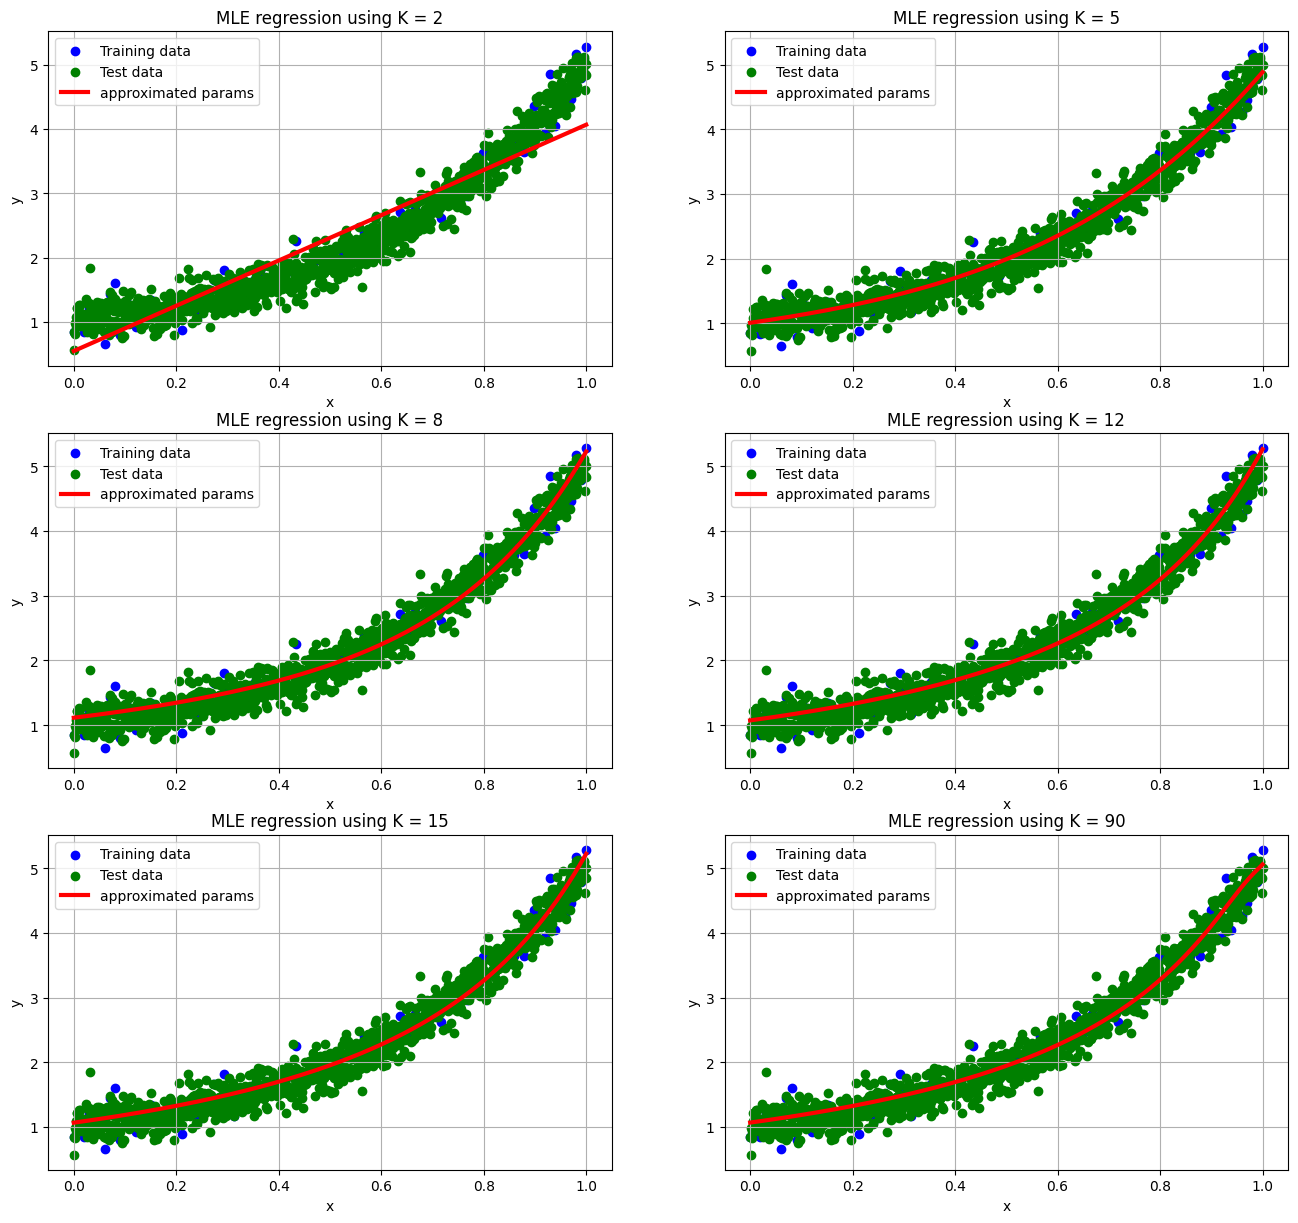

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 20))
for i, k in enumerate(K_test_mle):
    plt.subplot(len(K_test_mle) // 2 + 1, 2, i + 1)
    plt.scatter(X, Y, label='Training data', c='blue')
    plt.scatter(X_test, Y_test, label='Test data', c='green')
    plt.plot(X_test, fitted_data_mle[i], label=f'approximated params', c='red', linewidth=3)
    plt.title(f'MLE regression using K = {k}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()

plt.show()

## MAP

In [48]:
fitted_data_map = []

for lmbd in lambdas:
    for k in K_test_map:
        theta, *_ = gradient_descent((X, Y), k, MAP_f, MAP_grad, lr=learning_rate, max_iter=epochs, lmbd=lmbd)
        y_test_map = vandermonde_matrix(X_test, k) @ theta
        fitted_data_map.append(y_test_map)

        err = abs_error((X_test, Y_test), theta)
        print(f"Error for k = {k}, lambda = {lmbd}: {err}")

Error for k = 2, lambda = 0.1: 0.14516230024656027
Error for k = 5, lambda = 0.1: 0.037040122556757094
Error for k = 200, lambda = 0.1: 0.03900311202215723
Error for k = 2, lambda = 5: 0.27541749155585354
Error for k = 5, lambda = 5: 0.05116239590326361
Error for k = 200, lambda = 5: 0.054835638817250294
Error for k = 2, lambda = 10: 0.39982027825606603
Error for k = 5, lambda = 10: 0.07917392122189922
Error for k = 200, lambda = 10: 0.07705604736574073
Error for k = 2, lambda = 50: 1.053769932500762
Error for k = 5, lambda = 50: 0.48053330686620294
Error for k = 200, lambda = 50: 0.38034777472263565
Error for k = 2, lambda = 100: 1.7644634525149998
Error for k = 5, lambda = 100: 1.091538520517406
Error for k = 200, lambda = 100: 0.8677231348431113


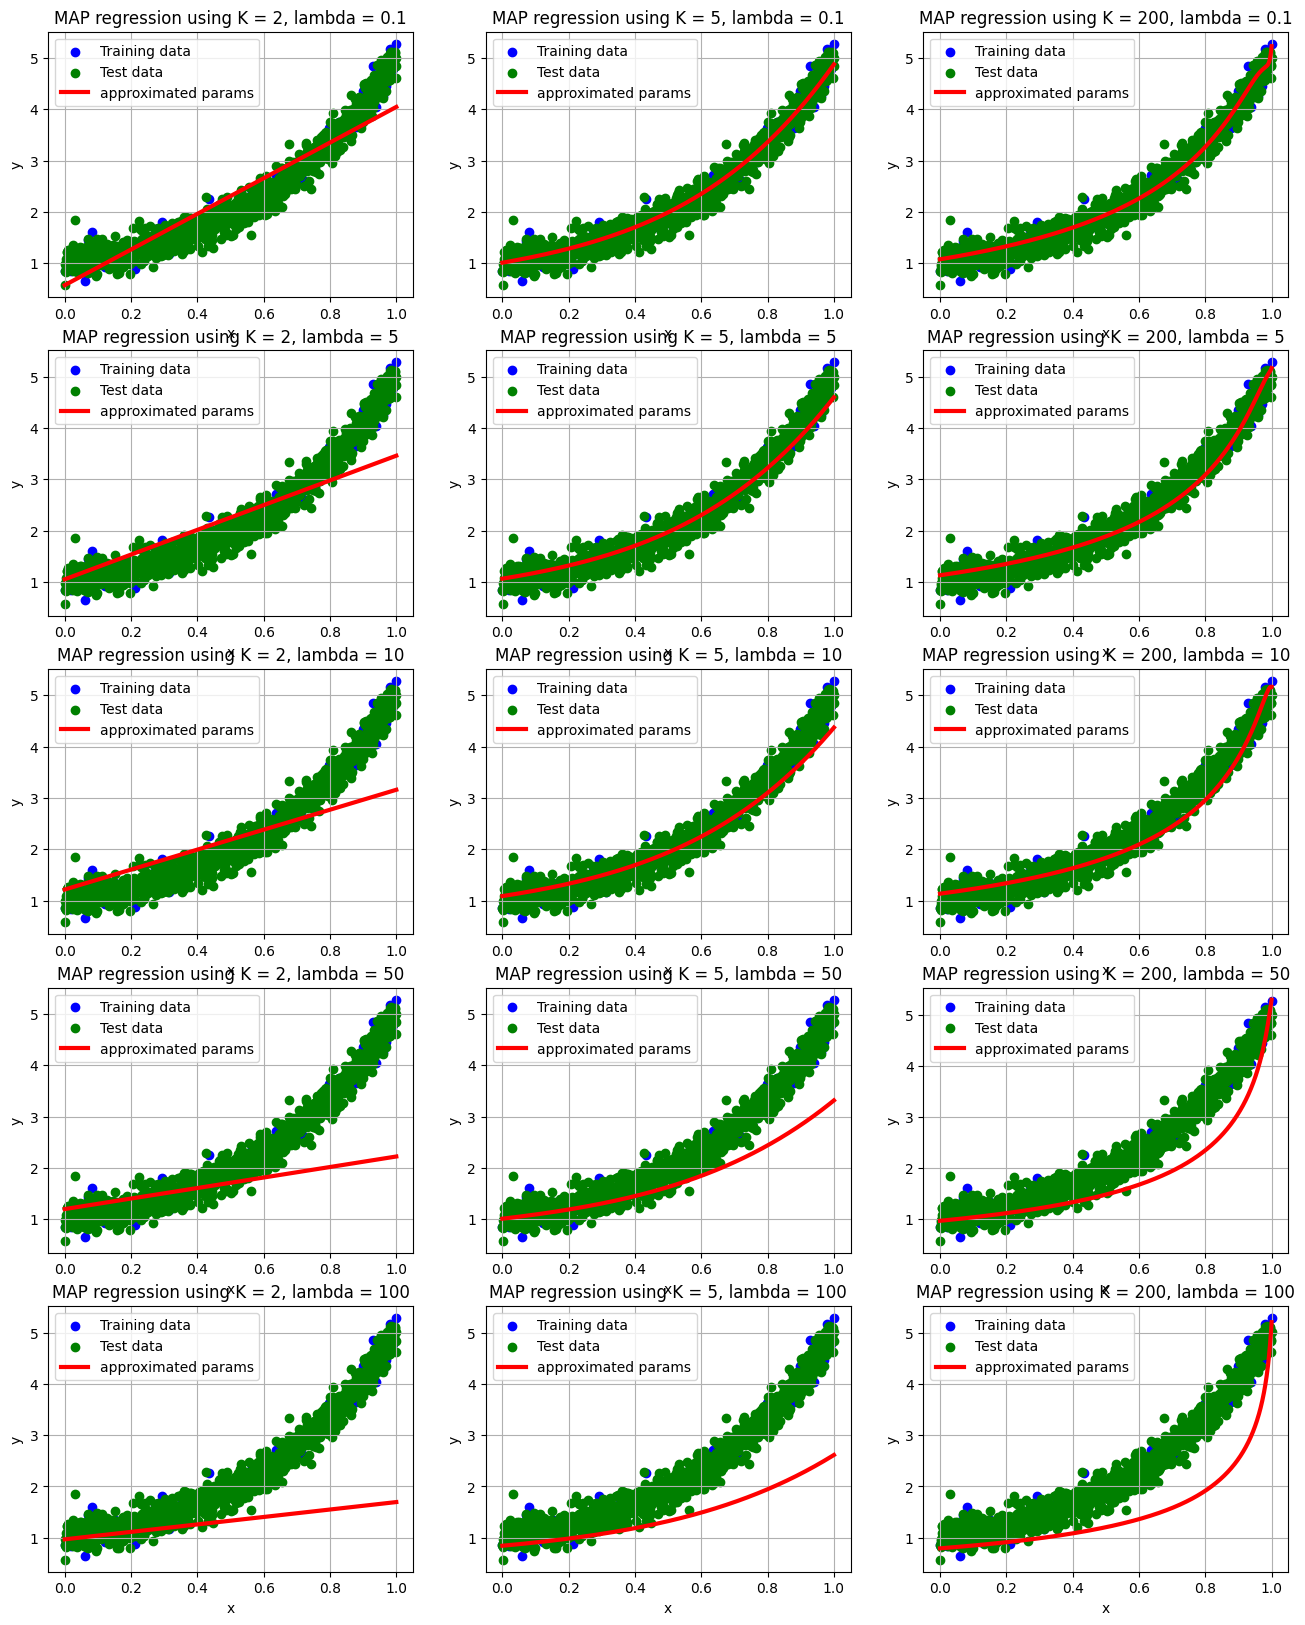

In [49]:
plt.figure(figsize=(16, 20))

for i, lmbd in enumerate(lambdas):
    for j, k in enumerate(K_test_map):
        index = i * len(K_test_map) + j
        plt.subplot(len(lambdas), len(K_test_map), index + 1)
        plt.scatter(X, Y, label='Training data', c='blue')
        plt.scatter(X_test, Y_test, label='Test data', c='green')
        plt.plot(X_test, fitted_data_map[index], label=f'approximated params', c='red', linewidth=3)
        plt.title(f'MAP regression using K = {k}, lambda = {lmbd}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.legend()

plt.show()


# Using SGD

### Define the needed functions to implement SGD

In [50]:
def create_mini_batches(D, minibatch_size):
    X, Y = D
    m = Y.shape[0]

    permutation = list(np.random.permutation(m - 1))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    minibatches = []
    number_of_minibatches = int(m / minibatch_size)

    for k in range(number_of_minibatches):
        minibatch_X = shuffled_X[k * minibatch_size:(k + 1) * minibatch_size]
        minibatch_Y = shuffled_Y[k * minibatch_size:(k + 1) * minibatch_size]
        minibatch_pair = (minibatch_X, minibatch_Y)
        minibatches.append(minibatch_pair)

    return minibatches

def SGD(D, K, f, grad_f, batch_size, n_epochs, **kwargs):
    theta = np.zeros((K,))
    alpha = 0.001
    for i in range(n_epochs):
        mini_batches = create_mini_batches(D, batch_size)
        for mini_batch in mini_batches:
            theta -= alpha * grad_f(mini_batch, K, theta, **kwargs)
    return theta

## MLE

### Regenerate data

In [51]:
fitted_data_mle = []
for i in K_test_mle:
    theta = SGD((X, Y), i, MLE_f, MLE_grad, 10, 100)
    y_test_mle = vandermonde_matrix(X_test, i) @ theta
    fitted_data_mle.append(y_test_mle)
    err = abs_error((X_test, Y_test), theta)
    print(f"Error for k = {i}: {err}")

Error for k = 2: 0.3073142121044973
Error for k = 5: 0.039562933950091986
Error for k = 8: 0.04011558717840015
Error for k = 12: 0.04748242274152918
Error for k = 15: 0.04912022130585247
Error for k = 90: 0.04432901717083541


### Plot the results

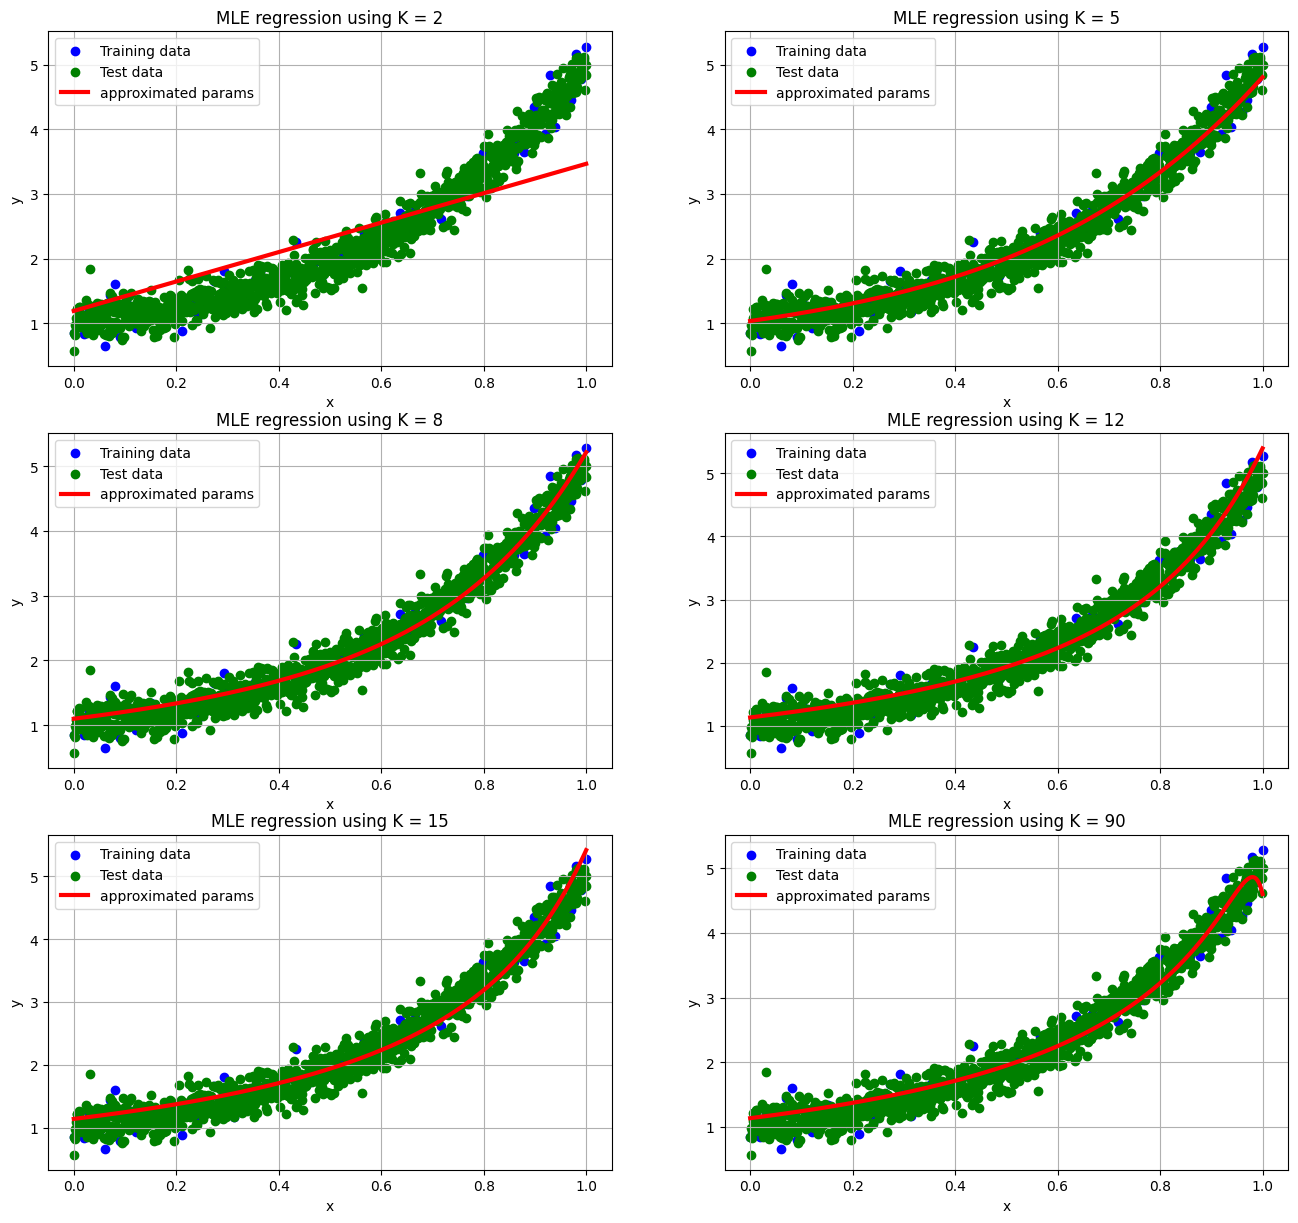

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 20))
for i, k in enumerate(K_test_mle):
    plt.subplot(len(K_test_mle) // 2 + 1, 2, i + 1)
    plt.scatter(X, Y, label='Training data', c='blue')
    plt.scatter(X_test, Y_test, label='Test data', c='green')
    plt.plot(X_test, fitted_data_mle[i], label=f'approximated params', c='red', linewidth=3)
    plt.title(f'MLE regression using K = {k}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()

plt.show()

## MAP

In [54]:
fitted_data_map = []

for lmbd in lambdas:
    for k in K_test_map:
        theta = SGD((X, Y), k, MAP_f, MAP_grad, 10, 100, lmbd=lmbd)
        y_test_map = vandermonde_matrix(X_test, k) @ theta
        fitted_data_map.append(y_test_map)

        err = abs_error((X_test, Y_test), theta)
        print(f"Error for k = {k}, lambda = {lmbd}: {err}")

Error for k = 2, lambda = 0.1: 0.3209947756773874
Error for k = 5, lambda = 0.1: 0.041247569018453445
Error for k = 200, lambda = 0.1: 0.046897074683698275
Error for k = 2, lambda = 5: 1.0879930641469782
Error for k = 5, lambda = 5: 0.5096548774814379
Error for k = 200, lambda = 5: 0.3749940452191055
Error for k = 2, lambda = 10: 1.8120199107844008
Error for k = 5, lambda = 10: 1.1422618381128031
Error for k = 200, lambda = 10: 0.8588082092293912
Error for k = 2, lambda = 50: 4.393083500146554
Error for k = 5, lambda = 50: 3.8870369570394057
Error for k = 200, lambda = 50: 3.4261355852850297
Error for k = 2, lambda = 100: 5.262154991810893
Error for k = 5, lambda = 100: 4.926287051824827
Error for k = 200, lambda = 100: 4.547264048087934


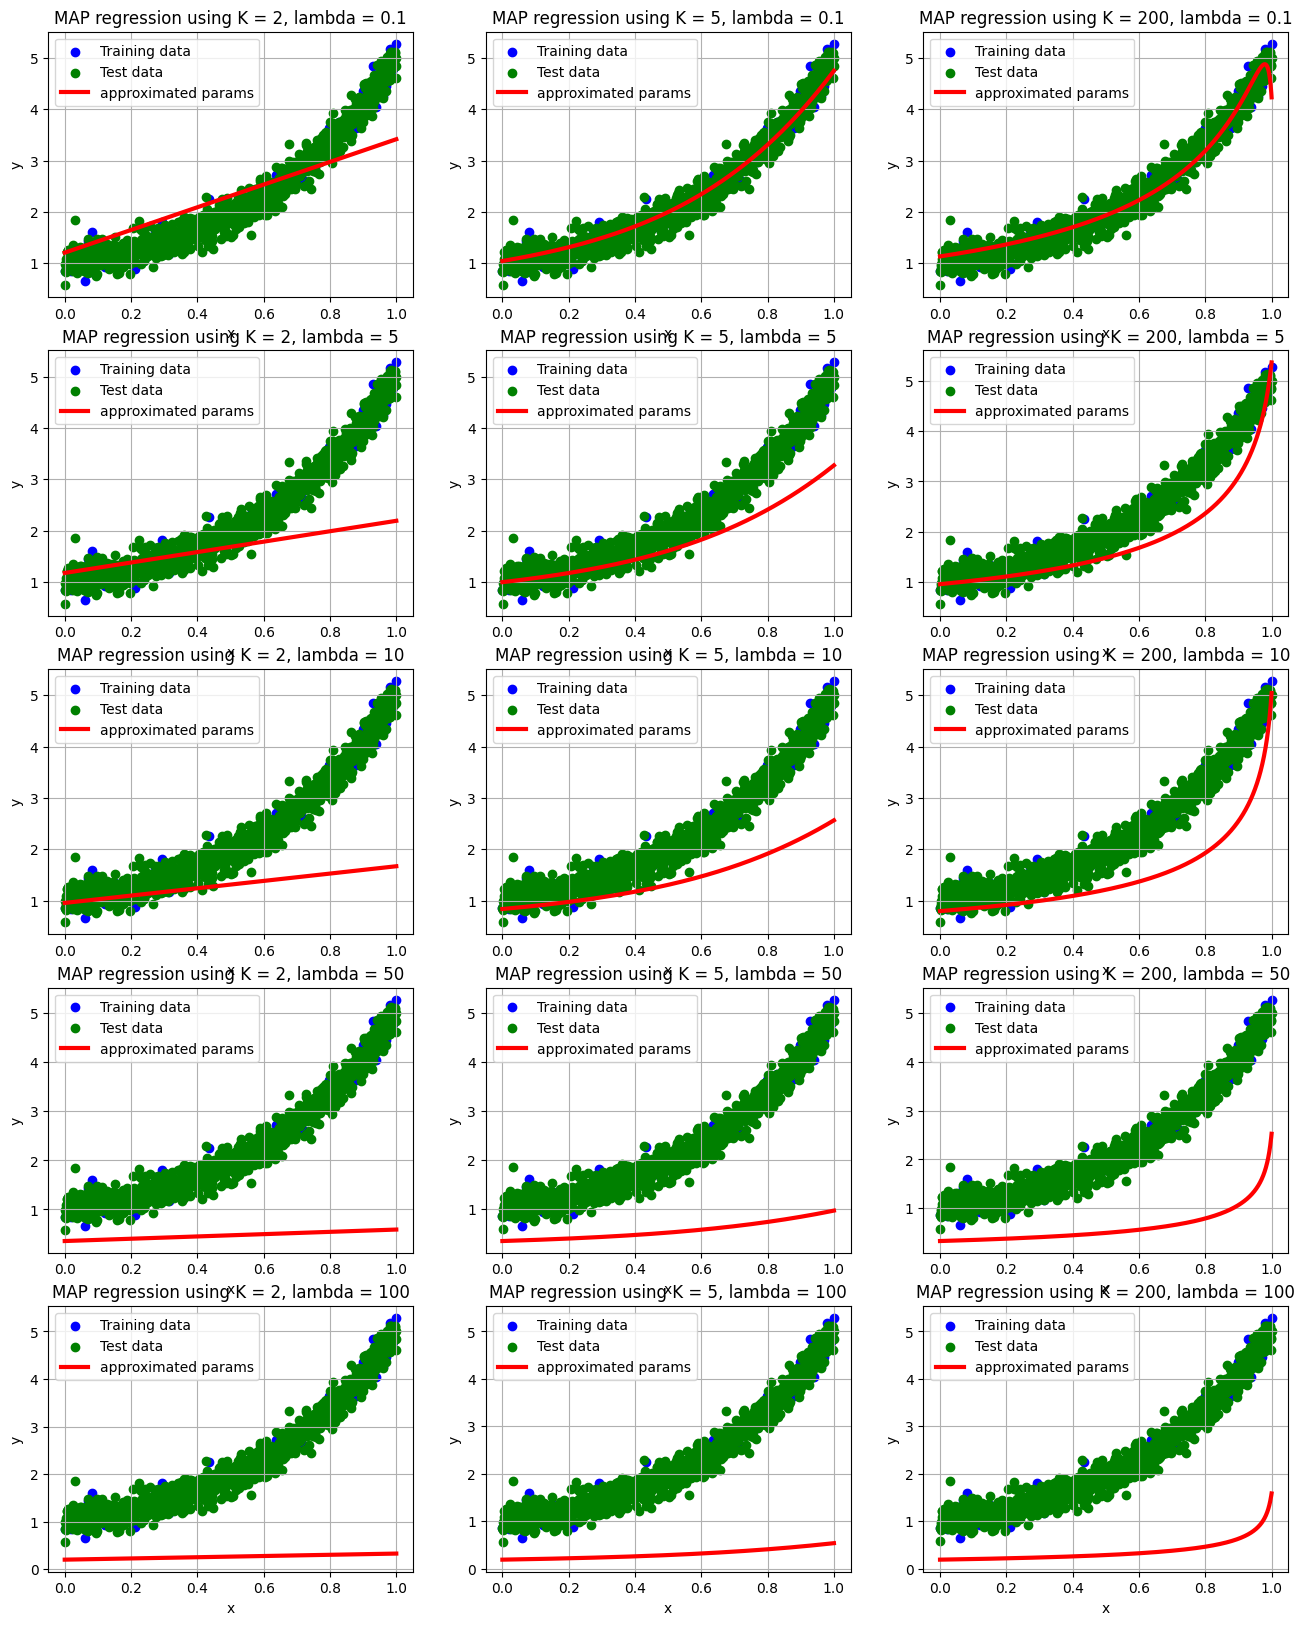

In [55]:
plt.figure(figsize=(16, 20))

for i, lmbd in enumerate(lambdas):
    for j, k in enumerate(K_test_map):
        index = i * len(K_test_map) + j
        plt.subplot(len(lambdas), len(K_test_map), index + 1)
        plt.scatter(X, Y, label='Training data', c='blue')
        plt.scatter(X_test, Y_test, label='Test data', c='green')
        plt.plot(X_test, fitted_data_map[index], label=f'approximated params', c='red', linewidth=3)
        plt.title(f'MAP regression using K = {k}, lambda = {lmbd}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.legend()

plt.show()
